In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML 101.1/data/diabetes.txt')
df

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
import numpy as np
df = df.to_numpy()
x=df[:,0:-1] # prendiamo tutti i dati tranne l'ultima colonna -> variabili indipendenti, osservazioni
y=df[:,-1] # prendiamo solo l'ultima colonna -> variabile dipendente, target

#Print class frequencies through collections counter
import collections
collections.Counter(y)

Counter({1.0: 268, 0.0: 500})

In [ ]:
print(x[:10])
print(f'y = {y[:10]}')

[[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]
 [  1.     85.     66.     29.      0.     26.6     0.351  31.   ]
 [  8.    183.     64.      0.      0.     23.3     0.672  32.   ]
 [  1.     89.     66.     23.     94.     28.1     0.167  21.   ]
 [  0.    137.     40.     35.    168.     43.1     2.288  33.   ]
 [  5.    116.     74.      0.      0.     25.6     0.201  30.   ]
 [  3.     78.     50.     32.     88.     31.      0.248  26.   ]
 [ 10.    115.      0.      0.      0.     35.3     0.134  29.   ]
 [  2.    197.     70.     45.    543.     30.5     0.158  53.   ]
 [  8.    125.     96.      0.      0.      0.      0.232  54.   ]]
y = [1. 0. 1. 0. 1. 0. 1. 0. 1. 1.]


In [ ]:
# suppress scientific notation
np.set_printoptions(suppress=True)
print(x[:10])
print(f'y = {y[:10]}')

[[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]
 [  1.     85.     66.     29.      0.     26.6     0.351  31.   ]
 [  8.    183.     64.      0.      0.     23.3     0.672  32.   ]
 [  1.     89.     66.     23.     94.     28.1     0.167  21.   ]
 [  0.    137.     40.     35.    168.     43.1     2.288  33.   ]
 [  5.    116.     74.      0.      0.     25.6     0.201  30.   ]
 [  3.     78.     50.     32.     88.     31.      0.248  26.   ]
 [ 10.    115.      0.      0.      0.     35.3     0.134  29.   ]
 [  2.    197.     70.     45.    543.     30.5     0.158  53.   ]
 [  8.    125.     96.      0.      0.      0.      0.232  54.   ]]
y = [1. 0. 1. 0. 1. 0. 1. 0. 1. 1.]


In [ ]:
# https://scikit-learn.org/stable/ libreria per il Machine Learning in Python

# come per altri metodi di ML, dobbiamo prendere i nostri valori delle osservazioni e splittarle in due insiemi:
# training set: è il sottoinsieme delle osservazioni che serve al nostro metodo per imparare
# test set: è il sottoinsieme delle osservazioni che serve al nostro metodo per capire se ha imparato bene

from sklearn.model_selection import train_test_split # suddivide le osservazioni nei due insiemi

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.30, # by default is 75%-25%
                                                    # shuffle is set True by default,
                                                    stratify = y, # per mantenere le proporzioni che ci sono nei dati di partenza
                                                    random_state = 123) # fix random seed for replicability

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((537, 8), (537,), (231, 8), (231,))

In [ ]:
print(X_train[:10])
print(f'y_train = {y_train[:10]}')

[[ 13.    152.     90.     33.     29.     26.8     0.731  43.   ]
 [  0.    104.     64.     37.     64.     33.6     0.51   22.   ]
 [  5.    137.    108.      0.      0.     48.8     0.227  37.   ]
 [  0.    111.     65.      0.      0.     24.6     0.66   31.   ]
 [  6.    105.     70.     32.     68.     30.8     0.122  37.   ]
 [  5.    115.     98.      0.      0.     52.9     0.209  28.   ]
 [ 13.    106.     70.      0.      0.     34.2     0.251  52.   ]
 [  0.     84.     64.     22.     66.     35.8     0.545  21.   ]
 [  2.     81.     72.     15.     76.     30.1     0.547  25.   ]
 [  2.     71.     70.     27.      0.     28.      0.586  22.   ]]
y_train = [1. 1. 1. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# importiamo il metodo che vogliamo utilizzara (tra i tanti disponibili...)
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=11) # impostiamo l'unico parametro (il numero di vicini)

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
# NB: notare che il metodo utilizza sia X_train che y_train, perché deve capire se sta predicendo correttamente
neigh.fit(X_train, y_train) # "alleniamo" il metodo con i dati del training set

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
# NB: notare che c'è solo X perché le y devono essere previste dal metodo
predictknn = neigh.predict(X_test) # proviamo a fare una previsione sui dati del test set

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predictknn[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
dati reali presenti nel dataset di test = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


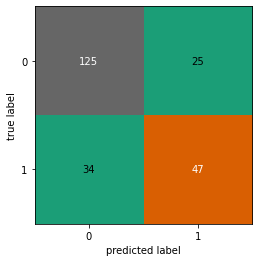

In [ ]:
#plots IMPORTS
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predictknn), cmap=plt.cm.Dark2)
plt.show()

In [ ]:
print(classification_report(y_test, predictknn))

              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81       150
         1.0       0.65      0.58      0.61        81

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [ ]:
# importiamo il metodo che vogliamo utilizzara (tra i tanti disponibili...)
from sklearn import tree

# impostiamo i parametri del metodo
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=4, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
tree_clf.fit(X_train,y_train)

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
predictdt = tree_clf.predict(X_test)

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predictdt[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
dati reali presenti nel dataset di test = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


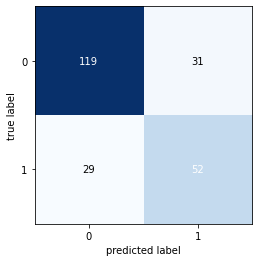

In [ ]:
#plots IMPORTS
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predictdt))
plt.show()

In [ ]:
print(classification_report(y_test, predictdt))

              precision    recall  f1-score   support

         0.0       0.80      0.79      0.80       150
         1.0       0.63      0.64      0.63        81

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



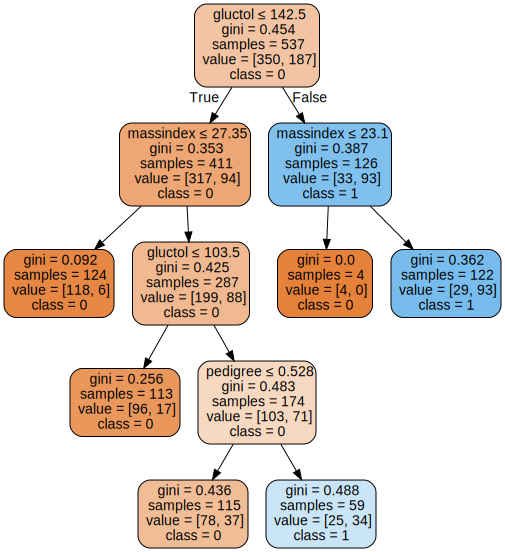

In [ ]:
features=list(df.columns.values)

import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                     feature_names=features[0:8],  
                     class_names=['0','1'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render('diabetes')
graph